In [3]:
import pandas as pd

data = pd.read_csv("./validate-2024-05-08-12-01-05-200/train.csv")
# plt.plot(data['time'], data['value'])
data

,Unnamed: 0,mean,Methane_0_1_-0.2500,Methane_0_1_-0.2250,Methane_0_1_-0.2000,Methane_0_1_-0.1750,Methane_0_1_-0.1500,Methane_0_1_-0.1250,Methane_0_1_-0.1000,Methane_0_1_-0.0750,...,Benzene_1_3_0.0250,Benzene_1_3_0.0500,Benzene_1_3_0.0750,Benzene_1_3_0.1000,Benzene_1_3_0.1250,Benzene_1_3_0.1500,Benzene_1_3_0.1750,Benzene_1_3_0.2000,Benzene_1_3_0.2250,Benzene_1_3_0.2500
0,0,99.187295,8.883380,-2.262831,-5.530198,-7.204212,-6.324457,-0.810431,5.959890,7.472770,...,8.529983,76.245008,196.526495,235.675760,42.728822,193.392288,298.634709,351.075407,393.623067,426.296098
1,1,263.277635,27.814245,21.985371,20.766116,21.161128,22.092843,23.239851,24.790156,22.222272,...,1012.827740,1003.481355,1026.878386,964.514052,920.231227,892.285855,876.774941,832.550166,794.145039,760.735265
2,2,99.036616,22.229052,13.883013,11.044393,8.992019,5.326295,11.212067,21.751358,20.216586,...,82.156696,182.652488,269.161372,41.974689,-278.812415,-236.255046,-95.975752,26.047265,86.009417,123.604629
3,3,57.478856,-14.172261,-14.257911,-18.377249,-20.784834,-23.443638,-20.266925,-14.304707,-11.228906,...,170.457602,122.496831,30.873300,186.550434,173.563669,-168.386110,-171.523137,-161.180922,-157.440249,-156.634198
4,4,52.621710,1.565485,2.626923,2.410891,2.852056,2.381234,0.923482,0.532824,0.527153,...,15.631898,27.888089,49.660308,27.657209,-24.545937,6.420876,20.250503,32.535558,44.810618,46.535310


13.124420522458408
103.50367873820193


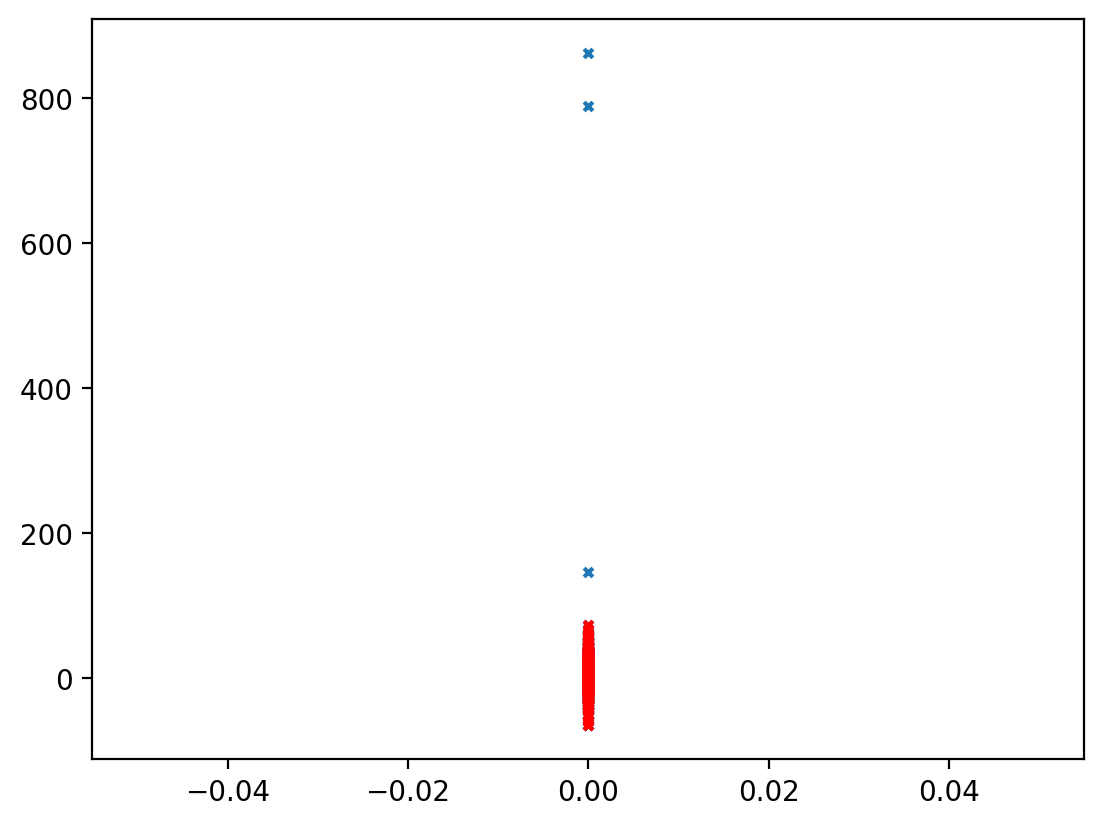

In [16]:
from matplotlib import pyplot as plt
import numpy as np

data_np = data.to_numpy()[0, 2 : (21 * 2 * 3 - 5) * 10 + 2]
plt.scatter(np.zeros_like(data_np), data_np, s=10, marker='x')
data_np_sort = np.sort(data_np)

data_remove = data_np_sort[:-3]
print(np.mean(np.abs(data_remove)))
plt.scatter(np.zeros_like(data_remove), data_remove, s=10, marker="x", c="red")

data_np_2 = data.to_numpy()[0, (21 * 2 * 3 - 5) * 10 + 2:]
print(np.mean(np.abs(data_np_2)))

In [21]:
print(np.linspace(-0.25, 0.25, 21))
print(np.linspace(-0.25, 0.25, 5))

[-0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25 ]
[-0.25  -0.125  0.     0.125  0.25 ]
